<a href="https://colab.research.google.com/github/reeha-parkar/Applied-Statistics/blob/master/AS_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import time
import scipy.stats

In [ ]:
data = pd.read_csv('bank_marketing.csv')

In [ ]:
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
1,1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,yes
2,2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no


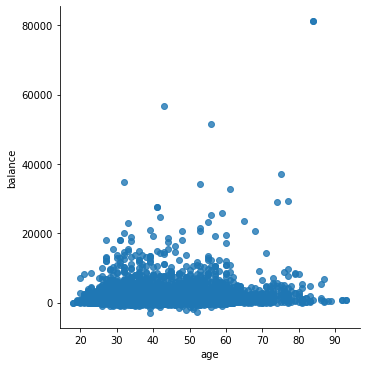

In [ ]:
# Generate a scatter plot of “age” and “balance” and choose which of the interpretation given below is correct?
sns.lmplot(x='age', y='balance', data=data, fit_reg=False)
plt.show()

In [ ]:
# What is the percentage split of the categories in the column “deposit”?
y = (data['deposit'].value_counts()['yes'])
n = (data['deposit'].value_counts()['no'])
yes = (y/(y+n))*100
print(yes)
print(100-yes)

46.98082780863644
53.01917219136356


In [ ]:
# How many parameters have datatype as float64
data.dtypes

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
dtype: object

In [ ]:
# What is the count of unique education levels in the data and find out how many clients have completed tertiary education?
unique_values = list(pd.unique(data['education'])) 
print(unique_values)
print(len(unique_values))
tertiary = data['education'].value_counts()['tertiary']
print(tertiary)

['unknown', 'secondary', 'tertiary', 'primary']
4
1871


In [ ]:
# How many  clients having secondary education  & have not subscribed to deposit?
data.pivot_table(index=['education','deposit'], aggfunc='size')

education  deposit
primary    no          444
           yes         302
secondary  no         1535
           yes        1184
tertiary   no          852
           yes        1019
unknown    no          128
           yes         117
dtype: int64

In [ ]:
# How many unemployed clients have  subscribed to deposit?
data.pivot_table(index=['job','deposit'], aggfunc='size')

job            deposit
admin.         no         355
               yes        306
blue-collar    no         629
               yes        346
entrepreneur   no         105
               yes         55
housemaid      no          83
               yes         60
management     no         649
               yes        669
retired        no         142
               yes        255
self-employed  no         103
               yes        103
services       no         263
               yes        189
student        no          53
               yes        129
technician     no         481
               yes        406
unemployed     no          78
               yes         92
unknown        no          18
               yes         12
dtype: int64

In [ ]:
# The total number of missing values in the dataframe is:
data.isna().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [ ]:
# What is the shape of dataset after dropping "Unnamed"?
data.drop('Unnamed: 0', axis=1).shape

(5581, 17)

In [ ]:
# What is the probability that client is doing 'management' job & having loan is yes or no
mgmt = data['job'].value_counts()['management']
print(mgmt)
all = data['job'].size
print(all)
print(mgmt/all)

1318
5581
0.2361583945529475


In [ ]:
# Find rows & columns having missing value & hence What is the shape of the missing ?
missing_data = data[data.isna().any(axis=1)]
print(missing_data.shape)

(0, 18)


In [ ]:
# The total number of duplicated rows in the dataframe is:
print("\nTotal number of duplicated rows is")
len(data)-len(data.drop_duplicates())


Total number of duplicated rows is


0

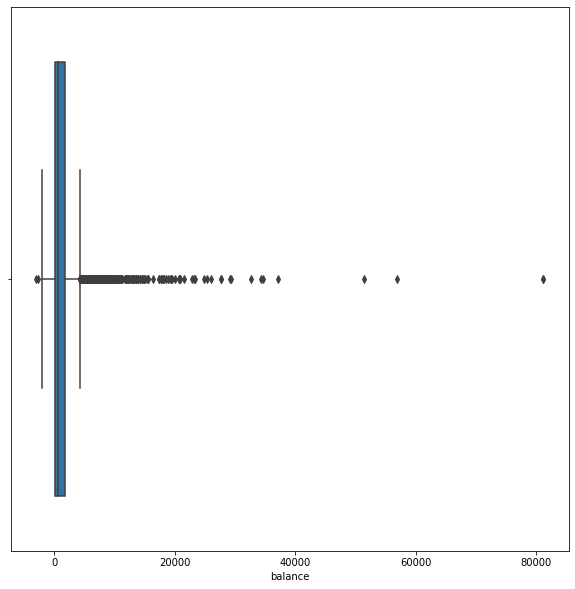

542.0


In [ ]:
# Plot boxplot & hence What is the median value of parameter balance
plt.figure(figsize=(10,10))
sns.boxplot(x='balance', data=data)
plt.show()
median = data.balance.median()
print(median)

## **Programs**

WAP to find Outliers in parameter  'age'

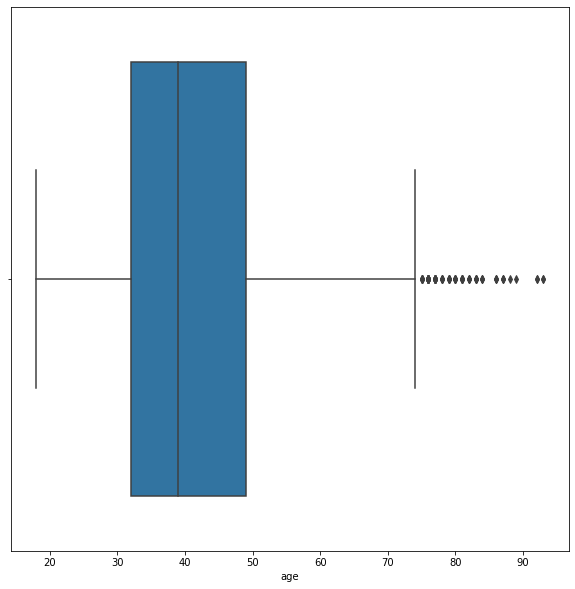

IQR =  17.0
Lower bound =  6.5
Upper bound =  74.5
Outliers of the age column are:  {75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 92, 93}
Number of outliers of the age column are:  16


In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='age', data=data)
plt.show()

# Outliers function
def detect_outliers(data, lb, ub):
    outliers = []
    for i in data:
        if i<=lb or i>=ub:
            outliers.append(i)
    return outliers

# Implementng IQR method to detect outliers

Q1, Q3 = np.percentile(data['age'], [25, 75])
IQR = Q3 - Q1
print('IQR = ', IQR)
lb = Q1 - (1.5 * IQR)
ub = Q3 + (1.5 * IQR)
print('Lower bound = ', lb)
print('Upper bound = ', ub)

outliers = detect_outliers(data['age'], lb, ub)
y = set(outliers)
print('Outliers of the age column are: ', y)
print('Number of outliers of the age column are: ', len(y))

WAP to find Confidence Interval of mean of age for Population (Client with Tertiary Education)

In [ ]:
# WAP to find Confidence Interval of mean of age for Population (Client with Tertiary Education)

is_tertiary = data['education'] == 'tertiary'
df1 = data[is_tertiary]
df1.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
7,7,46,management,married,tertiary,no,3,no,no,cellular,18,aug,92,4,-1,0,unknown,no
11,11,32,technician,single,tertiary,no,569,no,yes,cellular,29,jan,348,1,-1,0,unknown,no
16,16,29,technician,single,tertiary,no,673,yes,no,cellular,9,feb,835,3,-1,0,unknown,yes
17,17,38,management,married,tertiary,no,-498,no,no,cellular,14,aug,85,6,-1,0,unknown,no


In [ ]:
df = df1[['age', 'education']].dropna()
df

,age,education
3,34,tertiary
7,46,tertiary
11,32,tertiary
16,29,tertiary
17,38,tertiary
...,...,...
5561,49,tertiary
5564,43,tertiary
5566,36,tertiary
5567,51,tertiary


In [ ]:
agg_values = df.groupby("education").agg({"age" : [np.mean,np.std,np.size]})
agg_values

age                 
                mean        std  size
education                            
tertiary   39.454837  10.650147  1871

In [ ]:
mean_ter = 39.454837
std_ter = 10.650147
size_ter = 1871
z = 1.96
value = std_ter / np.sqrt(size_ter)
lcb = mean_ter - z * value
ucb = mean_ter + z * value
print('Confidence Interval:')
print(lcb,ucb)

Confidence Interval:
38.97225093208752 39.937423067912476
